In [1]:
from graph_structure import Article, User
from batchjob_utils import log_message, memory_usage_of
import os
import pickle
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict

sns.set_theme(style="darkgrid")

In [2]:
# path = '/work3/s204163/wiki/data-batches/wiki-revisions-filtered-df.pickle'

# with open(path, 'rb') as f:
#     df = pickle.load(f)
    
# category_count = defaultdict(int)
# category_article = defaultdict(set)

# for index, revision in tqdm(df.iterrows(), total=len(df)):
#     for category in revision['category']:
#         category_count[category] += 1
#         category_article[revision['article_id']].add(category)
        
with open('/work3/s204163/wiki/data-batches/category_count2.pickle', 'rb') as f:
    category_count = pickle.load(f)

with open('/work3/s204163/wiki/data-batches/category_article2.pickle', 'rb') as f:
    category_article = pickle.load(f)

In [3]:
category_count_article = defaultdict(int)
for article, categories in category_article.items():
    for category in categories:
        category_count_article[category] += 1
    

,count
count,63118.000000
mean,3.064245
std,9.417596
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1697.000000


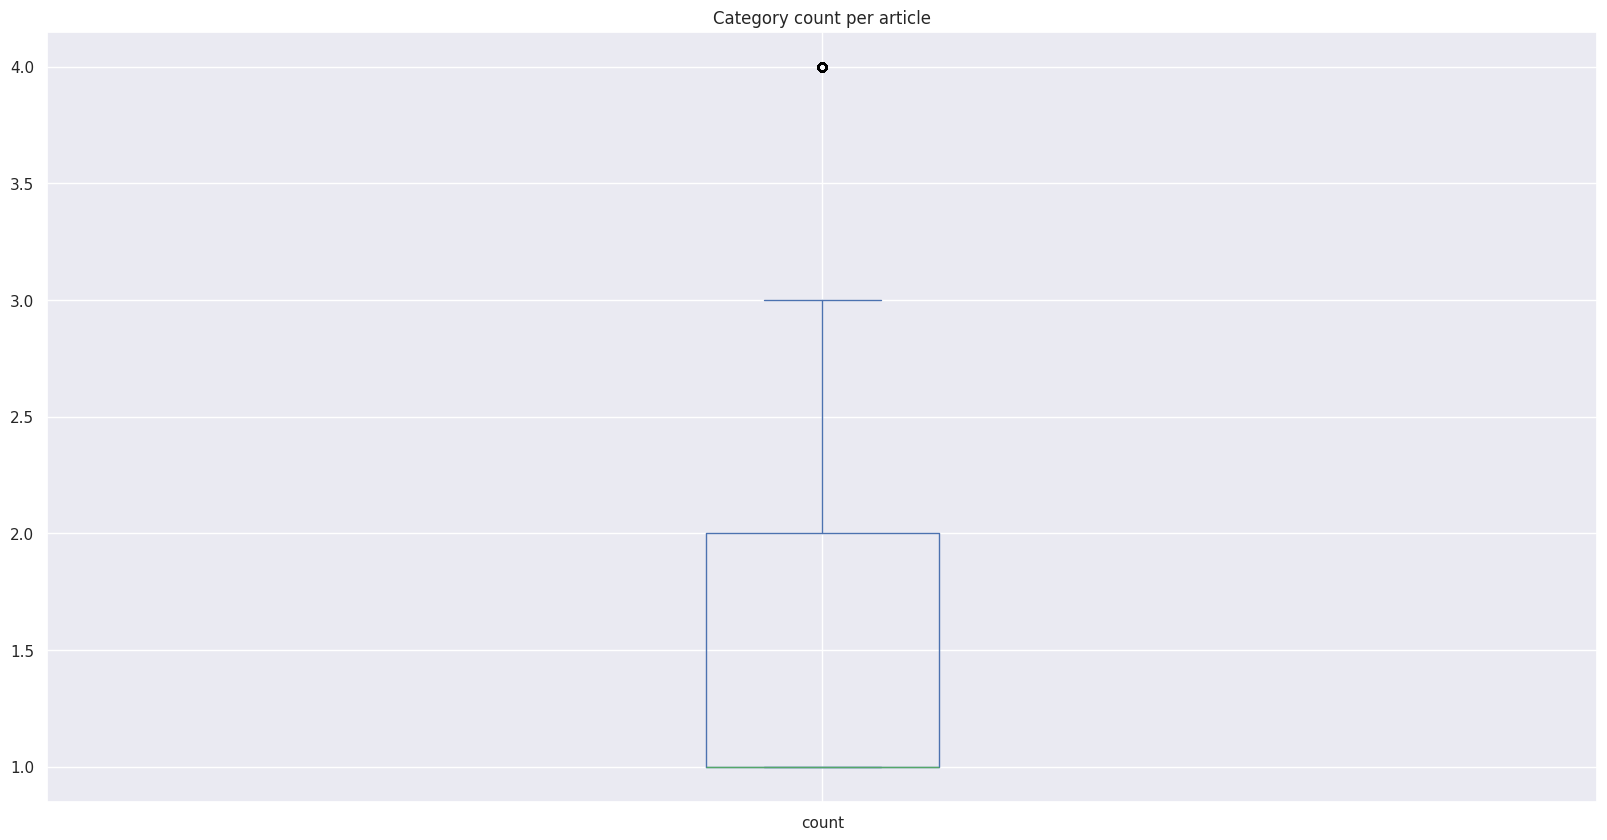

In [18]:
df = pd.DataFrame.from_dict(category_count_article, orient='index', columns=['count'])
df = df.sort_values(by=['count'], ascending=False)
df.plot(kind='box', figsize=(20, 10))
plt.title('Category count per article')
df.describe()

In [9]:
category_count_sorted = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
category_count_article_sorted = sorted(category_count_article.items(), key=lambda x: x[1], reverse=True)

In [7]:
for index, (key, value) in enumerate(category_count_sorted):
    if index > 10:
        break
    print(key, value)    

Living_people 890839
Grammy_Award_winners 184667
American_film_actors 178670
American_professional_wrestlers 141099
American_films 140811
English-language_films 139963
Windows_games 104308
2000s_music_groups 103714
Hollywood_Walk_of_Fame 102172
Rock_and_Roll_Hall_of_Fame_inductees 98835
Presidents_of_the_United_States 91658


In [10]:
for index, (key, value) in enumerate(category_count_article_sorted):
    if index > 10:
        break
    print(key, value)

Living_people 1697
English-language_films 311
Simpsons_episodes 265
American_films 264
Video_games_developed_in_Japan 224
Windows_games 216
Atlantic_hurricanes 212
Film_actors 195
New_York_state_highways 173
State_highways_in_New_York 172
American_film_actors 166


In [12]:
plt.figure(figsize=(20, 10))
plt.hist(category_count_article, bins=10)
plt.show() 

KeyboardInterrupt: 